<a href="https://colab.research.google.com/github/gabriel-breder/temperature-predicion/blob/main/cnn-lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Trabalho Topicos IA1/final_inmet_data.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147144 entries, 0 to 147143
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Unnamed: 0.1                                           147144 non-null  int64  
 1   Unnamed: 0                                             147144 non-null  int64  
 2   DATA                                                   147144 non-null  object 
 3   HORA                                                   147144 non-null  object 
 4   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           147144 non-null  float64
 5   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             147144 non-null  float64
 6   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             147144 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    147144 non-null  float64
 8   UMIDADE REL. MAX. NA HORA ANT. (AU

# Pre-processamento

In [3]:
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='Unnamed: 0.1')

df.head(15)

,DATA,HORA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"VENTO, VELOCIDADE HORARIA (m/s)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)",RADIACAO GLOBAL (KJ/m²),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
0,2007-05-18,00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-05-18,01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-05-18,02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-05-18,03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-05-18,04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2007-05-18,05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2007-05-18,06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2007-05-18,07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2007-05-18,08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2007-05-18,09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#df['DATA'] = pd.to_datetime(df['DATA'], format='%Y-%m-%d')
df['HORA'] = df['HORA'].replace(':', '.', regex=True).astype(float)

#df['Ano'] = df['DATA'].dt.year
#df['Mês'] = df['DATA'].dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147144 entries, 0 to 147143
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   DATA                                                   147144 non-null  object 
 1   HORA                                                   147144 non-null  float64
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           147144 non-null  float64
 3   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             147144 non-null  float64
 4   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             147144 non-null  float64
 5   UMIDADE RELATIVA DO AR, HORARIA (%)                    147144 non-null  float64
 6   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               147144 non-null  float64
 7   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               147144 non-null  float64
 8   TEMPERATURA DO PONTO DE ORVALHO (°

In [5]:
df = df[df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] != 0]

#idx_min_temp = df.groupby('Ano')['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].idxmin()

#dia_menos_quente = df.loc[idx_min_temp, ['Ano', 'DATA', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]

#print(dia_menos_quente)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146134 entries, 18 to 147143
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   DATA                                                   146134 non-null  object 
 1   HORA                                                   146134 non-null  float64
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           146134 non-null  float64
 3   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             146134 non-null  float64
 4   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             146134 non-null  float64
 5   UMIDADE RELATIVA DO AR, HORARIA (%)                    146134 non-null  float64
 6   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               146134 non-null  float64
 7   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               146134 non-null  float64
 8   TEMPERATURA DO PONTO DE ORVALHO (°C)  

In [10]:
new_df = df
#new_df = new_df[['HORA', 'Data e Hora', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]
df = df[['DATA', 'HORA', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]
new_df = new_df[['DATA', 'HORA', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]
new_df.head(15)

,DATA,HORA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
18,2007-05-18,18.0,23.5
19,2007-05-18,19.0,23.2
35,2007-05-19,11.0,23.6
36,2007-05-19,12.0,23.9
37,2007-05-19,13.0,25.0
60,2007-05-20,12.0,21.5
61,2007-05-20,13.0,22.4
62,2007-05-20,14.0,22.6
63,2007-05-20,15.0,25.3
64,2007-05-20,16.0,22.7


In [11]:
intervalos = {
    'Manhã': range(7, 12),
    'Tarde': range(12, 18),
    'Noite': range(18, 24),
    'Madrugada': [*range(0, 7), 24]
}

def determinar_periodo(hora):
    for periodo, intervalo in intervalos.items():
        if hora in intervalo:
            return periodo
    return None

new_df['Periodo'] = df['HORA'].apply(determinar_periodo)


new_df.head(15)

,DATA,HORA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",Periodo
18,2007-05-18,18.0,23.5,Noite
19,2007-05-18,19.0,23.2,Noite
35,2007-05-19,11.0,23.6,Manhã
36,2007-05-19,12.0,23.9,Tarde
37,2007-05-19,13.0,25.0,Tarde
60,2007-05-20,12.0,21.5,Tarde
61,2007-05-20,13.0,22.4,Tarde
62,2007-05-20,14.0,22.6,Tarde
63,2007-05-20,15.0,25.3,Tarde
64,2007-05-20,16.0,22.7,Tarde


In [12]:
novo_df = new_df.groupby(['DATA', 'Periodo'])['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean().reset_index()

novo_df = novo_df[['DATA', 'Periodo', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]

novo_df.head(15)

,DATA,Periodo,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,2007-05-18,Noite,23.350000
1,2007-05-19,Manhã,23.600000
2,2007-05-19,Tarde,24.450000
3,2007-05-20,Noite,22.216667
4,2007-05-20,Tarde,23.000000
5,2007-05-21,Madrugada,21.566667
6,2007-05-21,Manhã,21.675000
7,2007-05-21,Noite,23.233333
8,2007-05-21,Tarde,24.466667
9,2007-05-22,Madrugada,22.914286


In [11]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24412 entries, 0 to 24411
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DATA                                          24412 non-null  object 
 1   Periodo                                       24412 non-null  object 
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  24412 non-null  float64
dtypes: float64(1), object(2)
memory usage: 572.3+ KB


In [13]:
substituicao = {
    'Noite': 20,
    'Manhã': 8,
    'Tarde': 14,
    'Madrugada': 2
}

novo_df['HORA'] = novo_df['Periodo'].replace(substituicao)
novo_df = novo_df.drop(columns=['Periodo'])
novo_df.head(15)

,DATA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",HORA
0,2007-05-18,23.350000,20
1,2007-05-19,23.600000,8
2,2007-05-19,24.450000,14
3,2007-05-20,22.216667,20
4,2007-05-20,23.000000,14
5,2007-05-21,21.566667,2
6,2007-05-21,21.675000,8
7,2007-05-21,23.233333,20
8,2007-05-21,24.466667,14
9,2007-05-22,22.914286,2


In [14]:
novo_df['HORA'] = novo_df['HORA'].astype(str)
novo_df['DATA'] = pd.to_datetime(novo_df['DATA'] + ' ' + novo_df['HORA'])
novo_df.head(15)

,DATA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",HORA
0,2007-05-18 20:00:00,23.350000,20
1,2007-05-19 08:00:00,23.600000,8
2,2007-05-19 14:00:00,24.450000,14
3,2007-05-20 20:00:00,22.216667,20
4,2007-05-20 14:00:00,23.000000,14
5,2007-05-21 02:00:00,21.566667,2
6,2007-05-21 08:00:00,21.675000,8
7,2007-05-21 20:00:00,23.233333,20
8,2007-05-21 14:00:00,24.466667,14
9,2007-05-22 02:00:00,22.914286,2


In [15]:
novo_df = novo_df.drop(columns=['HORA'])
novo_df.head(15)

,DATA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,2007-05-18 20:00:00,23.350000
1,2007-05-19 08:00:00,23.600000
2,2007-05-19 14:00:00,24.450000
3,2007-05-20 20:00:00,22.216667
4,2007-05-20 14:00:00,23.000000
5,2007-05-21 02:00:00,21.566667
6,2007-05-21 08:00:00,21.675000
7,2007-05-21 20:00:00,23.233333
8,2007-05-21 14:00:00,24.466667
9,2007-05-22 02:00:00,22.914286


In [16]:
novo_df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] = novo_df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].round(1)
novo_df.head(15)

,DATA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,2007-05-18 20:00:00,23.4
1,2007-05-19 08:00:00,23.6
2,2007-05-19 14:00:00,24.4
3,2007-05-20 20:00:00,22.2
4,2007-05-20 14:00:00,23.0
5,2007-05-21 02:00:00,21.6
6,2007-05-21 08:00:00,21.7
7,2007-05-21 20:00:00,23.2
8,2007-05-21 14:00:00,24.5
9,2007-05-22 02:00:00,22.9


In [17]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24412 entries, 0 to 24411
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   DATA                                          24412 non-null  datetime64[ns]
 1   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  24412 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 381.6 KB


# Plotando a Temperatura como uma Série Temporal

In [18]:
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
    """to plot the series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Year")
    plt.ylabel("Temperature")
    plt.grid(True)

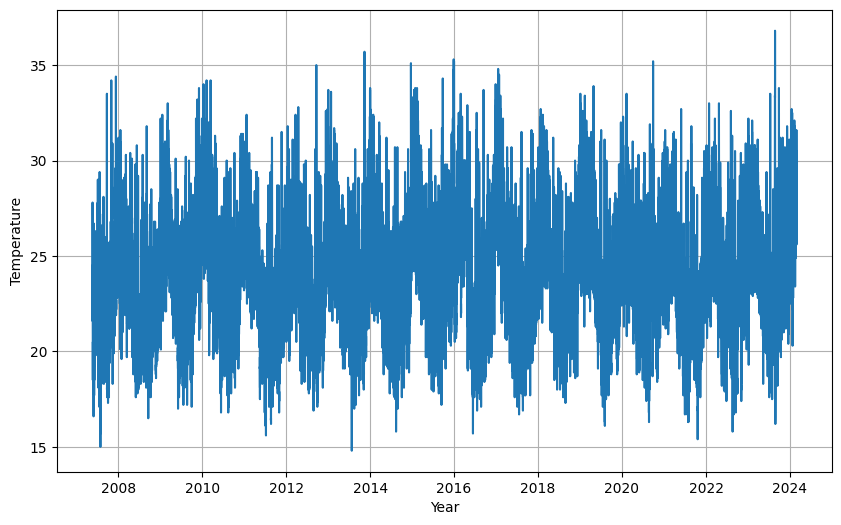

In [19]:
time_step = novo_df["DATA"].tolist()
temperature = novo_df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].tolist()

series = np.array(temperature)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

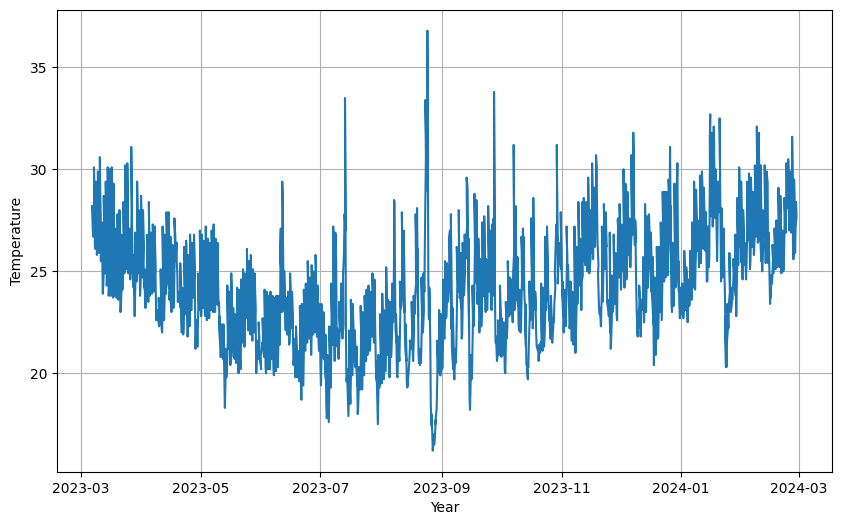

In [20]:
plt.figure(figsize=(10, 6))
plot_series(time[-1437:], series[-1437:])

In [21]:
split_time = 19950
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [22]:
print(time_train)

[Timestamp('2007-05-18 20:00:00') Timestamp('2007-05-19 08:00:00')
 Timestamp('2007-05-19 14:00:00') ... Timestamp('2021-02-07 14:00:00')
 Timestamp('2021-02-08 02:00:00') Timestamp('2021-02-08 08:00:00')]


# Naive Forecast

In [23]:
naive_forecast = series[split_time - 1:-1]

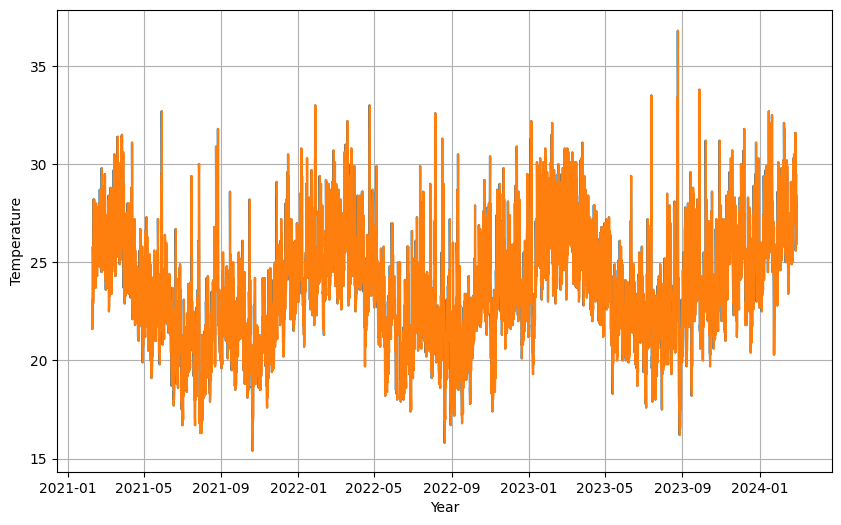

In [24]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

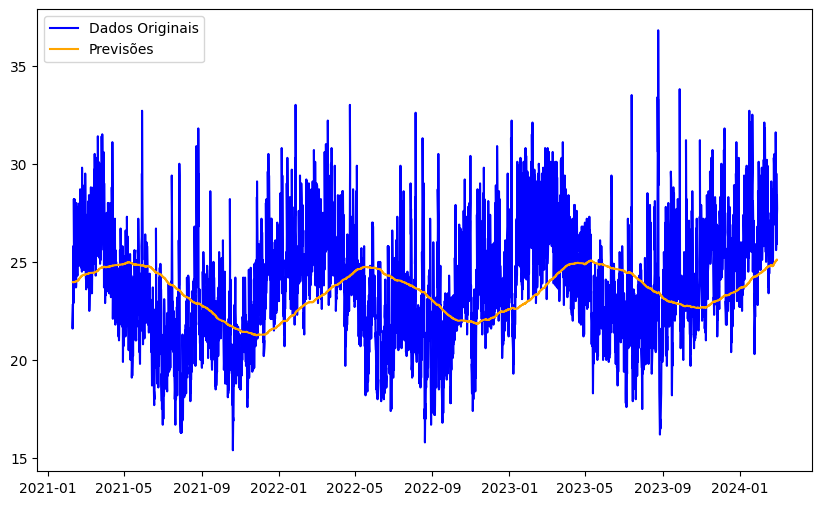

In [28]:
moving_avg = moving_average_forecast(series, 720)[split_time - 720:]

plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid, color='blue', label='Dados Originais')
plt.plot(time_valid, moving_avg, color='orange', label='Previsões')
plt.legend()
plt.show()

In [29]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

9.010980605587962
2.4142137618905326


# CNN-LSTM

In [38]:
series1 = tf.expand_dims(series, axis=-1)
ds = tf.data.Dataset.from_tensor_slices(series1[:20])
for val in ds:
    print(val.numpy())

[23.4]
[23.6]
[24.4]
[22.2]
[23.]
[21.6]
[21.7]
[23.2]
[24.5]
[22.9]
[23.7]
[23.1]
[27.8]
[22.8]
[22.6]
[22.2]
[23.]
[21.]
[19.1]
[19.5]


In [39]:
dataset = ds.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[23.4] [23.6] [24.4] [22.2] [23.] 
[23.6] [24.4] [22.2] [23.] [21.6] 
[24.4] [22.2] [23.] [21.6] [21.7] 
[22.2] [23.] [21.6] [21.7] [23.2] 
[23.] [21.6] [21.7] [23.2] [24.5] 
[21.6] [21.7] [23.2] [24.5] [22.9] 
[21.7] [23.2] [24.5] [22.9] [23.7] 
[23.2] [24.5] [22.9] [23.7] [23.1] 
[24.5] [22.9] [23.7] [23.1] [27.8] 
[22.9] [23.7] [23.1] [27.8] [22.8] 
[23.7] [23.1] [27.8] [22.8] [22.6] 
[23.1] [27.8] [22.8] [22.6] [22.2] 
[27.8] [22.8] [22.6] [22.2] [23.] 
[22.8] [22.6] [22.2] [23.] [21.] 
[22.6] [22.2] [23.] [21.] [19.1] 
[22.2] [23.] [21.] [19.1] [19.5] 
[23.] [21.] [19.1] [19.5] 
[21.] [19.1] [19.5] 
[19.1] [19.5] 
[19.5] 


In [40]:
dataset = ds.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[23.4] [23.6] [24.4] [22.2] [23.] 
[23.6] [24.4] [22.2] [23.] [21.6] 
[24.4] [22.2] [23.] [21.6] [21.7] 
[22.2] [23.] [21.6] [21.7] [23.2] 
[23.] [21.6] [21.7] [23.2] [24.5] 
[21.6] [21.7] [23.2] [24.5] [22.9] 
[21.7] [23.2] [24.5] [22.9] [23.7] 
[23.2] [24.5] [22.9] [23.7] [23.1] 
[24.5] [22.9] [23.7] [23.1] [27.8] 
[22.9] [23.7] [23.1] [27.8] [22.8] 
[23.7] [23.1] [27.8] [22.8] [22.6] 
[23.1] [27.8] [22.8] [22.6] [22.2] 
[27.8] [22.8] [22.6] [22.2] [23.] 
[22.8] [22.6] [22.2] [23.] [21.] 
[22.6] [22.2] [23.] [21.] [19.1] 
[22.2] [23.] [21.] [19.1] [19.5] 


In [41]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

[[23.4]
 [23.6]
 [24.4]
 [22.2]
 [23. ]]
[[23.6]
 [24.4]
 [22.2]
 [23. ]
 [21.6]]
[[24.4]
 [22.2]
 [23. ]
 [21.6]
 [21.7]]
[[22.2]
 [23. ]
 [21.6]
 [21.7]
 [23.2]]
[[23. ]
 [21.6]
 [21.7]
 [23.2]
 [24.5]]
[[21.6]
 [21.7]
 [23.2]
 [24.5]
 [22.9]]
[[21.7]
 [23.2]
 [24.5]
 [22.9]
 [23.7]]
[[23.2]
 [24.5]
 [22.9]
 [23.7]
 [23.1]]
[[24.5]
 [22.9]
 [23.7]
 [23.1]
 [27.8]]
[[22.9]
 [23.7]
 [23.1]
 [27.8]
 [22.8]]
[[23.7]
 [23.1]
 [27.8]
 [22.8]
 [22.6]]
[[23.1]
 [27.8]
 [22.8]
 [22.6]
 [22.2]]
[[27.8]
 [22.8]
 [22.6]
 [22.2]
 [23. ]]
[[22.8]
 [22.6]
 [22.2]
 [23. ]
 [21. ]]
[[22.6]
 [22.2]
 [23. ]
 [21. ]
 [19.1]]
[[22.2]
 [23. ]
 [21. ]
 [19.1]
 [19.5]]


In [42]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[23.4]
 [23.6]
 [24.4]
 [22.2]] [[23.]]
[[23.6]
 [24.4]
 [22.2]
 [23. ]] [[21.6]]
[[24.4]
 [22.2]
 [23. ]
 [21.6]] [[21.7]]
[[22.2]
 [23. ]
 [21.6]
 [21.7]] [[23.2]]
[[23. ]
 [21.6]
 [21.7]
 [23.2]] [[24.5]]
[[21.6]
 [21.7]
 [23.2]
 [24.5]] [[22.9]]
[[21.7]
 [23.2]
 [24.5]
 [22.9]] [[23.7]]
[[23.2]
 [24.5]
 [22.9]
 [23.7]] [[23.1]]
[[24.5]
 [22.9]
 [23.7]
 [23.1]] [[27.8]]
[[22.9]
 [23.7]
 [23.1]
 [27.8]] [[22.8]]
[[23.7]
 [23.1]
 [27.8]
 [22.8]] [[22.6]]
[[23.1]
 [27.8]
 [22.8]
 [22.6]] [[22.2]]
[[27.8]
 [22.8]
 [22.6]
 [22.2]] [[23.]]
[[22.8]
 [22.6]
 [22.2]
 [23. ]] [[21.]]
[[22.6]
 [22.2]
 [23. ]
 [21. ]] [[19.1]]
[[22.2]
 [23. ]
 [21. ]
 [19.1]] [[19.5]]


In [43]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[23.2]
 [24.5]
 [22.9]
 [23.7]] [[23.1]]
[[24.5]
 [22.9]
 [23.7]
 [23.1]] [[27.8]]
[[22.9]
 [23.7]
 [23.1]
 [27.8]] [[22.8]]
[[22.2]
 [23. ]
 [21.6]
 [21.7]] [[23.2]]
[[23. ]
 [21.6]
 [21.7]
 [23.2]] [[24.5]]
[[27.8]
 [22.8]
 [22.6]
 [22.2]] [[23.]]
[[23.1]
 [27.8]
 [22.8]
 [22.6]] [[22.2]]
[[23.6]
 [24.4]
 [22.2]
 [23. ]] [[21.6]]
[[23.7]
 [23.1]
 [27.8]
 [22.8]] [[22.6]]
[[22.6]
 [22.2]
 [23. ]
 [21. ]] [[19.1]]
[[22.2]
 [23. ]
 [21. ]
 [19.1]] [[19.5]]
[[21.6]
 [21.7]
 [23.2]
 [24.5]] [[22.9]]
[[22.8]
 [22.6]
 [22.2]
 [23. ]] [[21.]]
[[24.4]
 [22.2]
 [23. ]
 [21.6]] [[21.7]]
[[23.4]
 [23.6]
 [24.4]
 [22.2]] [[23.]]
[[21.7]
 [23.2]
 [24.5]
 [22.9]] [[23.7]]


In [44]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print("*"*25)

x =  [[[24.4]
  [22.2]
  [23. ]
  [21.6]]

 [[24.5]
  [22.9]
  [23.7]
  [23.1]]]
y =  [[[21.7]]

 [[27.8]]]
*************************
x =  [[[23.2]
  [24.5]
  [22.9]
  [23.7]]

 [[27.8]
  [22.8]
  [22.6]
  [22.2]]]
y =  [[[23.1]]

 [[23. ]]]
*************************
x =  [[[23.6]
  [24.4]
  [22.2]
  [23. ]]

 [[23. ]
  [21.6]
  [21.7]
  [23.2]]]
y =  [[[21.6]]

 [[24.5]]]
*************************
x =  [[[22.2]
  [23. ]
  [21.6]
  [21.7]]

 [[23.1]
  [27.8]
  [22.8]
  [22.6]]]
y =  [[[23.2]]

 [[22.2]]]
*************************
x =  [[[22.8]
  [22.6]
  [22.2]
  [23. ]]

 [[22.9]
  [23.7]
  [23.1]
  [27.8]]]
y =  [[[21. ]]

 [[22.8]]]
*************************
x =  [[[23.4]
  [23.6]
  [24.4]
  [22.2]]

 [[22.2]
  [23. ]
  [21. ]
  [19.1]]]
y =  [[[23. ]]

 [[19.5]]]
*************************
x =  [[[23.7]
  [23.1]
  [27.8]
  [22.8]]

 [[21.6]
  [21.7]
  [23.2]
  [24.5]]]
y =  [[[22.6]]

 [[22.9]]]
*************************
x =  [[[21.7]
  [23.2]
  [24.5]
  [22.9]]

 [[22.6]
  [22.2]
 

In [45]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [46]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(19950,)
Epoch 1/100
78/78 [==============================] - 34s 356ms/step - loss: 25.0331 - mae: 25.5319 - lr: 1.0000e-08
Epoch 2/100
78/78 [==============================] - 29s 358ms/step - loss: 5.8872 - mae: 6.3576 - lr: 1.1220e-08
Epoch 3/100
78/78 [==============================] - 34s 426ms/step - loss: 5.5483 - mae: 6.0164 - lr: 1.2589e-08
Epoch 4/100
78/78 [==============================] - 30s 376ms/step - loss: 5.4107 - mae: 5.8778 - lr: 1.4125e-08
Epoch 5/100
78/78 [==============================] - 30s 376ms/step - loss: 5.2811 - mae: 5.7473 - lr: 1.5849e-08
Epoch 6/100
78/78 [==============================] - 30s 377ms/step - loss: 5.1545 - mae: 5.6200 - lr: 1.7783e-08
Epoch 7/100
78/78 [==============================] - 30s 377ms/step - loss: 5.0289 - mae: 5.4939 - lr: 1.9953e-08
Epoch 8/100
78/78 [===========

(1e-08, 0.0001, 0.0, 60.0)

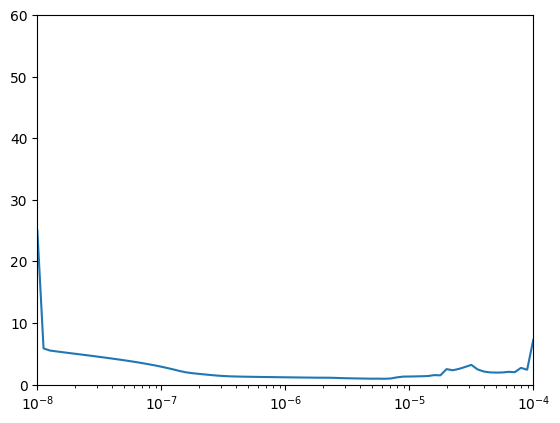

In [47]:
tracker = EmissionsTracker(
    project_name="treino com CNN-LSTM parte I",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

emissions: float = tracker.stop()
print(f"emissions={emissions}")

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [48]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

Epoch 1/500
199/199 [==============================] - 35s 154ms/step - loss: 12.2067 - mae: 12.6876
Epoch 2/500
199/199 [==============================] - 29s 144ms/step - loss: 5.6299 - mae: 6.1028
Epoch 3/500
199/199 [==============================] - 29s 147ms/step - loss: 3.8940 - mae: 4.3579
Epoch 4/500
199/199 [==============================] - 29s 144ms/step - loss: 2.7127 - mae: 3.1655
Epoch 5/500
199/199 [==============================] - 29s 143ms/step - loss: 2.0516 - mae: 2.4978
Epoch 6/500
199/199 [==============================] - 30s 149ms/step - loss: 1.7200 - mae: 2.1625
Epoch 7/500
199/199 [==============================] - 30s 147ms/step - loss: 1.5494 - mae: 1.9892
Epoch 8/500
199/199 [==============================] - 31s 156ms/step - loss: 1.4723 - mae: 1.9102
Epoch 9/500
199/199 [==============================] - 29s 142ms/step - loss: 1.4313 - mae: 1.8676
Epoch 10/500
199/199 [==============================] - 29s 143ms/step - loss: 1.3898 - mae: 1.8247
Epoch 1

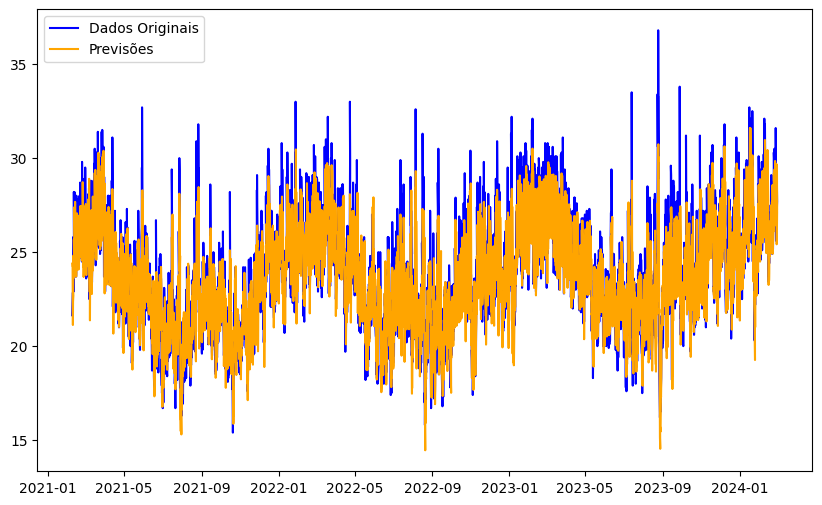

In [50]:
tracker = EmissionsTracker(
    project_name="treino com CNN-LSTM parte I",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()


tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum = 0.9)
#optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

emissions: float = tracker.stop()
print(f"emissions={emissions}")

rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(x_valid, rnn_forecast)
print(f'MAE: {mae:.4f}')

rmse = np.sqrt(mean_squared_error(x_valid, rnn_forecast))
print(f'RMSE: {rmse:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid, color='blue', label='Dados Originais')
plt.plot(time_valid, rnn_forecast, color='orange', label='Previsões')
plt.legend()
plt.show()